<a href="https://colab.research.google.com/github/julissamijares/DS210Final/blob/main/SI-analysis/Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *

In [ ]:
#load the data
df = pd.read_csv("/content/drive/My Drive/WORK/SI_Budget_Report/Datasets/clean_OpBudget.csv")

df.head()

,Cabinet,Department,Program,Expense Category,FY21,FY22,FY23,FY24
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.90,99314.000,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938.000,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.30,29630.000,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.60,16164.36,24900.000,36115.00


In [ ]:
# Calculate the percentage increase for each program from FY21 to FY24
program_growth = df.groupby('Program')[['FY21', 'FY22', 'FY23', 'FY24']].sum().pct_change(axis=1).mean(axis=1)*100

# Sort programs based on the average percentage increase in descending order
sorted_program = program_growth.sort_values(ascending=False)

# Get the top 5 programs
top_5_programs = sorted_program.head(10)

# Print the result
print(top_5_programs)


Program
OPAT Commission                                    inf
Civilian Review Board (CRB)                        inf
Internal Affairs Oversight Panel (IOAP)            inf
Workers' Compensation Fund                 6435.728003
Trust                                       764.697419
Execution of Courts                         136.808391
Annual Audit Costs                          133.889576
Reserve for Collective Bargaining City      117.210330
Small & Local Business                      112.997707
Program & Partnerships                       85.718278
dtype: float64


In [ ]:
# List of programs to filter
selected_programs = ["Trust", "Execution of Courts", "Annual Audit Costs"]

df[df['Program'].isin(selected_programs)]

,Cabinet,Department,Program,Expense Category,FY21,FY22,FY23,FY24
311,Finance Cabinet,Execution of Courts,Execution of Courts,Other Expenses,5790677.54,34508737.33,5.000000e+06,5.000000e+06
353,Finance Cabinet,Treasury Department,Trust,Personnel Services,631.62,11696.00,4.443244e+03,3.129628e+04
651,Other,Annual Audit Costs,Annual Audit Costs,Other Expenses,142850.00,708203.00,7.500000e+05,7.500000e+05


In [ ]:
# List of programs to filter
selected_programs = ["OPAT Commission", "Civilian Review Board (CRB)", "Internal Affairs Oversight Panel (IOAP)", "Workers' Compensation Fund"]

df[df['Program'].isin(selected_programs)]


,Cabinet,Department,Program,Expense Category,FY21,FY22,FY23,FY24
56,OPAT Cabinet,Office of Police Accountability & Transparency,OPAT Commission,Personnel Services,0.00,482414.94,1089212.793,1.216544e+06
57,OPAT Cabinet,Office of Police Accountability & Transparency,OPAT Commission,Contractual Services,0.00,65382.21,99460.000,8.461000e+04
58,OPAT Cabinet,Office of Police Accountability & Transparency,OPAT Commission,Supplies & Materials,0.00,8838.29,20000.000,1.300000e+04
59,OPAT Cabinet,Office of Police Accountability & Transparency,OPAT Commission,Current Charges & Obligations,0.00,43996.10,98870.830,1.026319e+05
60,OPAT Cabinet,Office of Police Accountability & Transparency,OPAT Commission,Equipment,0.00,92311.76,6000.000,6.000000e+03
61,OPAT Cabinet,Office of Police Accountability & Transparency,Civilian Review Board (CRB),Personnel Services,0.00,16225.00,49999.574,1.941428e+04
62,OPAT Cabinet,Office of Police Accountability & Transparency,Internal Affairs Oversight Panel (IOAP),Personnel Services,0.00,8575.00,124999.930,1.078572e+04
387,People Operations Cabinet,Workers' Compensation Fund,Workers' Compensation Fund,Other Expenses,7664.89,1484880.28,2000000.000,2.000000e+06


In [ ]:
# Sort programs based on the average percentage increase in descending order
sorted_program = program_growth.sort_values(ascending=True)

# Get the top 5 programs
bottom_5_programs = sorted_program.head(5)

# Print the result
print(bottom_5_programs)

Program
Affirmative Action       -29.221530
Middle                   -21.848105
A&F                      -20.120960
Consumer Affairs         -16.337909
Library Administration   -15.740089
dtype: float64


In [ ]:
# List of programs to filter
selected_programs = ["Affirmative Action", "Middle", "A&F"]

df[df['Program'].isin(selected_programs)]

,Cabinet,Department,Program,Expense Category,FY21,FY22,FY23,FY24
183,Education Cabinet,Boston Public Schools,Middle,Personnel Services,24108847.92,16534744.54,1.169594e+07,1.123138e+07
184,Education Cabinet,Boston Public Schools,Middle,Contractual Services,295937.81,79314.00,4.016900e+04,4.912900e+04
185,Education Cabinet,Boston Public Schools,Middle,Supplies & Materials,182890.27,65010.87,2.099500e+04,2.164500e+04
264,Finance Cabinet,Office of Finance,A&F,Personnel Services,785330.07,877574.82,9.379002e+05,8.818114e+05
265,Finance Cabinet,Office of Finance,A&F,Contractual Services,2879758.07,1506499.17,1.706603e+06,8.004100e+05
266,Finance Cabinet,Office of Finance,A&F,Supplies & Materials,1476.03,508.73,1.250000e+03,1.250000e+03
267,Finance Cabinet,Office of Finance,A&F,Current Charges & Obligations,3651.29,2939.04,2.800000e+03,2.404000e+03
359,People Operations Cabinet,Human Resources,Affirmative Action,Contractual Services,2024410.00,50000.00,6.162500e+04,5.250000e+04
360,People Operations Cabinet,Human Resources,Affirmative Action,Current Charges & Obligations,550.00,1250.00,2.000000e+03,2.000000e+03


Number of programs with a decrease in funding: 23
Number of programs with an increase in funding: 163


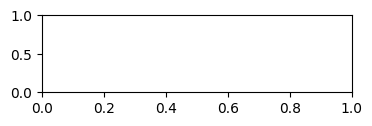

In [ ]:
# Count the number of departments with a decrease and increase in funding
num_decrease = (program_growth < 0).sum()
num_increase = (program_growth > 0).sum()

# Print the result
print(f"Number of programs with a decrease in funding: {num_decrease}")
print(f"Number of programs with an increase in funding: {num_increase}")

In [ ]:
# Calculate the sum for each Expense Category for each FY
category_sum = df.groupby('Program')[['FY21', 'FY22', 'FY23', 'FY24']].sum()

# Find the average sum for the four total FY
average_sum = category_sum.mean(axis=1)

# Calculate the percentage of the average sum each Expense Category takes up
percentage_of_total = (average_sum / average_sum.sum()) * 100

# Create a new DataFrame for the results
result_df = pd.DataFrame({
    'Program': category_sum.index,
    'Total Sum FY21-FY24': average_sum,
    'Percentage of Total': percentage_of_total
})

# Sort the DataFrame by 'Total Sum FY21-FY24' in descending order
result_df = result_df.sort_values(by='Total Sum FY21-FY24', ascending=False)

# Reset the index for better presentation
result_df = result_df.reset_index(drop=True)

# Select only the top 10 programs
top_10_programs = result_df.head(10)

# Print the result
print(top_10_programs)

                    Program  Total Sum FY21-FY24  Percentage of Total
0                  Pensions         3.400404e+08             8.722223
1               BPS Finance         2.764208e+08             7.090346
2            BPS Operations         2.591483e+08             6.647296
3    Charter School Tuition         2.481138e+08             6.364254
4          Health Insurance         2.139428e+08             5.487750
5   Boston Fire Suppression         2.120006e+08             5.437932
6                       K-8         2.068779e+08             5.306531
7              Debt Service         2.054053e+08             5.268759
8  Bureau of Field Services         1.973635e+08             5.062482
9                Elementary         1.689451e+08             4.333534
